# **Amazon Web Service SaaS Sales Data Analysis**

Hubert Santara Wonys JCDS 2024




Description


AWS (Amazon Web Services) adalah layanan Komputasi Awan dari perusahaan Amazon. AWS adalah salah satu pilihan teratas untuk komputasi awan dengan serangkaian keuntungan dan fitur. Komputasi Awan memungkinkan pengguna untuk penyimpanan data skala besar (Aws-Amazon, 2023). Teknologi ini pada dasarnya adalah jawaban untuk kebutuhan pelaku bisnis modern di berbagai industri. Saat ini, telah ada serangkaian nama Komputasi Awan dengan berbagai kelas dan jenis layanan, termasuk AWS (Meilinaeka, 2023).

Problem

Analisis kinerja penjualan perusahaan. Identifikasi faktor-faktor kunci yang mempengaruhi penjualan dan profit, khususnya yang berkaitan dengan profit negatif. Ini dapat mencakup dampak diskon terhadap penjualan, kinerja produk yang berbeda, atau tren penjualan dari waktu ke waktu.





Bagaimana cara menganalisis faktor-faktor yang berkontribusi pada profitabilitas negatif dalam penjualan produk SaaS di AWS dan memberikan rekomendasi untuk meningkatkan profitabilitas produk tersebut berdasarkan kinerja penjualan perusahaan, segmen pelanggan, dan pasar perusahaan?”

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from tabulate import tabulate
import warnings
from scipy.stats import kruskal

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

In [49]:
df = pd.read_csv('SaaS-Sales.csv', 
                 parse_dates=['Order Date'],    # Mengubah format tanggal dari objek menjadi Datetime64[ns]
                 dtype= {'Customer ID': str})   # Mengubah format ID menjadi string karena mengandung karakter alfanumerik
df = df.drop(columns=['Row ID','Date Key'])  # Menghapus kolom 'Row ID' dan 'Date Key'

display(df.head(), df.tail())  # Menampilkan 5 baris pertama dan 5 baris terakhir dari DataFrame


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [31]:
display(df.head(),df.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Load Dataset

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7458 entries, 2 to 9992
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      7458 non-null   object        
 1   Order Date    7458 non-null   datetime64[ns]
 2   Contact Name  7458 non-null   object        
 3   Country       7458 non-null   object        
 4   City          7458 non-null   object        
 5   Region        7458 non-null   object        
 6   Subregion     7458 non-null   object        
 7   Customer      7458 non-null   object        
 8   Customer ID   7458 non-null   object        
 9   Industry      7458 non-null   object        
 10  Segment       7458 non-null   object        
 11  Product       7458 non-null   object        
 12  License       7458 non-null   object        
 13  Sales         7458 non-null   float64       
 14  Quantity      7458 non-null   int64         
 15  Discount      7458 non-null   float64      

1.Missing Values

In [72]:

missing_data = df.isnull().sum()
print("Missing values before cleaning:")
print(missing_data)


df['Discount'].fillna(0, inplace=True)




missing_data_after = df.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_data_after)


print("\nShape of dataset after cleaning:", df.shape)


print("\nSample data after cleaning:")
print(df.head())




Missing values before cleaning:
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Missing values after cleaning:
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Shape of dataset after cleaning: (7458, 17)

Sample data after cleaning:
           Order ID Order Date    Contact Name        Country           City  \
2  AMER-2022-138688 2022-06-13  Deirdre Bailey  United States  New York City   
4  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany   

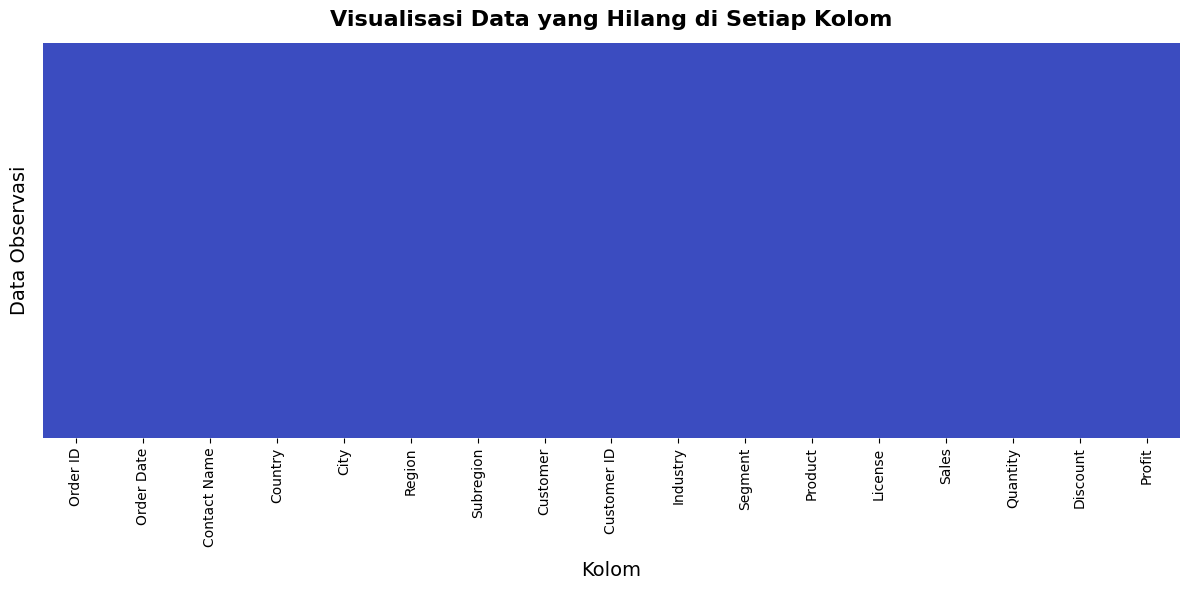

In [74]:
plt.figure(figsize=(12, 6))

# Menghitung jumlah dan persentase missing values di setiap kolom
missing_percent = df.isna().mean() * 100

# Membuat heatmap untuk missing values
sns.heatmap(df.isna(), cmap="coolwarm", cbar=False, yticklabels=False)

# Menambahkan judul dan label sumbu
plt.title("Visualisasi Data yang Hilang di Setiap Kolom", fontsize=16, pad=12, fontweight='bold')
plt.xlabel("Kolom", fontsize=14, labelpad=10)
plt.ylabel("Data Observasi", fontsize=14, labelpad=10)

# Menambahkan anotasi persentase missing values di atas setiap kolom
for idx, col in enumerate(df.columns):
    if missing_percent[idx] > 0:
        plt.text(idx + 0.5, -0.1, f'{missing_percent[idx]:.1f}%', 
                 ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()

**data set nya tidak ada missing values**
Jadi tidak ada yang perlu di handle

2. Untuk check duplicate data

In [75]:
df.duplicated().sum()


np.int64(0)

In [84]:
df[df.duplicated(keep=False)]
# duplicate_rows = df[df.duplicated()]
# print(f"Jumlah duplikat: {duplicate_rows.shape[0]}")

# df.drop_duplicates(inplace=True)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


2.Outliers

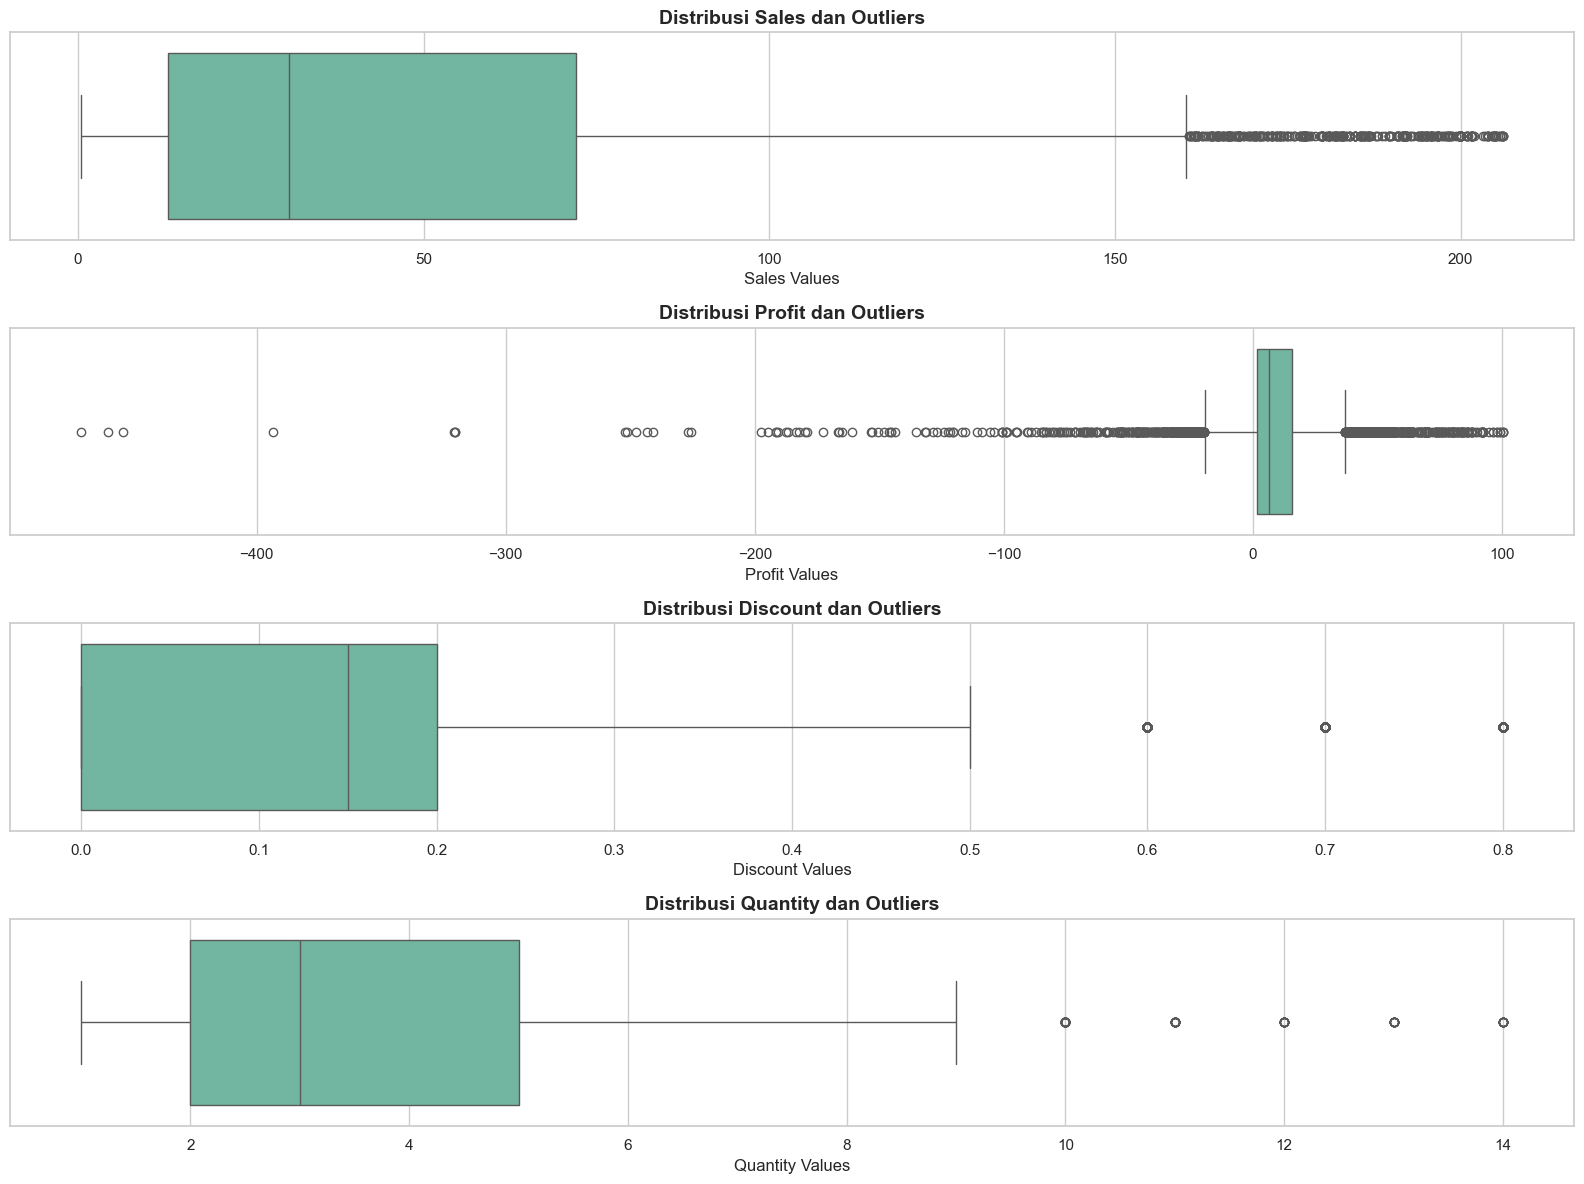

In [ ]:



sns.set(style="whitegrid")

# Memilih fitur yang akan divisualisasikan
features = ['Sales', 'Profit', 'Discount', 'Quantity']

# Membuat figur dan menentukan ukuran
plt.figure(figsize=(16, 12))

# Looping untuk membuat subplot untuk setiap fitur
for idx, col in enumerate(features, start=1):
    plt.subplot(4, 1, idx)
    
    # Menggunakan boxplot dari seaborn
    sns.boxplot(x=df[col], palette="Set2")
    
    # Menambahkan judul
    plt.title(f'Distribusi {col} dan Outliers', fontsize=14, fontweight='bold')
    
    # Menambahkan label sumbu x
    plt.xlabel(f'{col} Values', fontsize=12)
    
    # Menghitung jumlah outliers
    outliers = df[col][df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))].count()
    
    # Menambahkan anotasi jumlah outliers di plot
    plt.annotate(f'Outliers: {outliers}', xy=(1, df[col].max()), 
                 xytext=(1.05, df[col].max() * 0.9), 
                 fontsize=10, color='red', fontweight='bold',
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Mengatur layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()


In [79]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,7458.000000,7458.000000,7458.000000,7458.000000
mean,50.510115,0.159944,8.134979,3.514615
std,50.512690,0.219973,27.720821,2.080997
min,0.444000,0.000000,-470.548000,1.000000
25%,12.960000,0.000000,1.725150,2.000000
50%,30.560000,0.150000,6.431400,3.000000
75%,71.990000,0.200000,15.825600,5.000000
max,206.112000,0.800000,100.425500,14.000000


1.Check untuk anomaly di sales,quantity dan discount

In [92]:
min_sales = df['Sales'].min()

# Membuat DataFrame untuk menampilkan nilai minimum penjualan yang diformat sebagai mata uang
sales_info = pd.DataFrame({'Lowest Sales': [min_sales]})
sales_info['Lowest Sales'] = sales_info['Lowest Sales'].apply(lambda x: f'${x:,.2f}')

# Menambahkan judul pada DataFrame
print("Informasi Penjualan Terendah:")
display(sales_info)

Informasi Penjualan Terendah:


,Lowest Sales
0,$0.44


In [91]:
max_sales = df['Sales'].max()

# Membuat DataFrame untuk menampilkan nilai maksimum penjualan yang diformat sebagai mata uang
sales_info = pd.DataFrame({'Highest Sales': [max_sales]})
sales_info['Highest Sales'] = sales_info['Highest Sales'].apply(lambda x: f'${x:,.2f}')

# Menambahkan judul pada DataFrame
print("Informasi Penjualan Tertinggi:")
display(sales_info)

Informasi Penjualan Tertinggi:


,Highest Sales
0,$206.11


Sudah benar bahwa nilai Penjualan terendah tidak ada yang bernilai negatif, dan pada Penjualan tertinggi juga tidak ada nilai negatif. Dapat disimpulkan bahwa tidak ada anomali dalam kolom ini.

In [94]:
# Sorting the DataFrame 'df descending order based on smallest 'Sales'

# Grouping by 'Sales' and aggregating 'Profit' and 'Quantity' columns
grouped_by_sales_Smallest = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=True).reset_index()

total_profit = grouped_by_sales_Smallest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_sales_Smallest['Sales'] = grouped_by_sales_Smallest['Sales'].apply(lambda x: f'${x:,.2f}')
grouped_by_sales_Smallest['Profit'] = ((grouped_by_sales_Smallest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_sales_Smallest['Quantity'] = grouped_by_sales_Smallest['Quantity'].apply(lambda x: f'{x} pcs')

grouped_by_sales_Smallest.head()

,Sales,Profit,Quantity
0,$0.44,-0.0%,1 pcs
1,$0.56,-0.0%,1 pcs
2,$0.84,-0.0%,1 pcs
3,$0.85,-0.0%,1 pcs
4,$0.88,-0.0%,1 pcs


In [121]:
# Mengelompokkan DataFrame 'df' berdasarkan 'Sales' dan mengagregasi kolom 'Profit' dan 'Quantity'
sales_summary = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Menghitung total profit untuk perhitungan persentase
total_profit = sales_summary['Profit'].sum()

# Mengurutkan DataFrame berdasarkan 'Sales' dalam urutan menurun
sales_summary = sales_summary.sort_values(by='Sales', ascending=False)

# Memformat kolom 'Sales' sebagai nilai dolar
sales_summary['Sales'] = sales_summary['Sales'].apply(lambda x: f'${x:,.2f}')

# Menghitung persentase profit terhadap total profit dan memformatnya
sales_summary['Profit'] = ((sales_summary['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Memformat kolom 'Quantity' untuk menampilkan jumlah unit
sales_summary['Quantity'] = sales_summary['Quantity'].apply(lambda x: f'{x} pcs')

# Menampilkan hasil dari DataFrame yang telah diproses
sales_summary.head()

,Sales,Profit,Quantity
3925,$206.11,0.08%,6 pcs
3924,$206.10,0.18%,10 pcs
3923,$206.00,-0.04%,3 pcs
3922,$205.99,-0.0%,1 pcs
3921,$205.92,0.0%,4 pcs


2.Discount

In [117]:
min_discount = df['Discount'].min()

# Membuat DataFrame untuk menampilkan nilai minimum diskon yang diformat sebagai persentase
discount_info = pd.DataFrame({'Lowest Discount': [min_discount * 100]})
discount_info['Lowest Discount'] = discount_info['Lowest Discount'].round(2).astype(str) + '%'

# Menambahkan judul pada DataFrame
print("Informasi Diskon Terendah:")
display(discount_info)

Informasi Diskon Terendah:


,Lowest Discount
0,0.0%


In [118]:
max_discount = df['Discount'].max() * 100  

# Membuat DataFrame untuk menampilkan nilai maksimum diskon yang diformat sebagai persentase
discount_info = pd.DataFrame({'Highest Discount': [max_discount]})
discount_info['Highest Discount'] = discount_info['Highest Discount'].round(2).astype(str) + '%'

# Menambahkan judul pada DataFrame
print("Informasi Diskon Tertinggi:")
display(discount_info)

Informasi Diskon Tertinggi:


,Highest Discount
0,80.0%


Tidak ada anomali di discount

In [124]:
# Mengelompokkan DataFrame 'df' berdasarkan 'Discount' dan mengagregasi kolom 'Profit', 'Quantity', dan 'Sales'
discount_summary = df.groupby('Discount').agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).reset_index()

# Menghitung total profit untuk perhitungan persentase
total_profit = discount_summary['Profit'].sum()

# Mengurutkan DataFrame berdasarkan 'Discount' dalam urutan menurun
discount_summary = discount_summary.sort_values(by='Discount', ascending=False)

# Memformat kolom 'Sales' sebagai nilai dolar
discount_summary['Sales'] = discount_summary['Sales'].apply(lambda x: f'${x:,.3f}')

# Menghitung persentase profit terhadap total profit dan memformatnya
discount_summary['Profit'] = ((discount_summary['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Memformat kolom 'Quantity' untuk menampilkan jumlah unit
discount_summary['Quantity'] = discount_summary['Quantity'].apply(lambda x: f'{x} pcs')

# Memformat kolom 'Discount' sebagai persentase
discount_summary['Discount'] = (discount_summary['Discount'] * 100).round(2).astype(str) + '%'

# Menampilkan hasil dari DataFrame yang telah diproses
discount_summary.head()

,Discount,Profit,Quantity,Sales
11,80.0%,-18.3%,1113 pcs,"$5,338.848"
10,70.0%,-13.29%,1475 pcs,"$9,130.383"
9,60.0%,-5.81%,460 pcs,"$4,485.040"
8,50.0%,-2.24%,56 pcs,"$2,378.900"
7,45.0%,-0.31%,4 pcs,$365.574


3.Profit

In [127]:
# Mengelompokkan DataFrame 'df' berdasarkan 'Profit' dan mengagregasi kolom 'Discount', 'Quantity', dan 'Sales'
profit_summary = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).reset_index()

# Menghitung total profit untuk perhitungan persentase
total_profit = profit_summary['Profit'].sum()

# Mengurutkan DataFrame berdasarkan 'Profit' dalam urutan menaik
profit_summary = profit_summary.sort_values(by='Profit', ascending=True)

# Memformat kolom 'Sales' sebagai nilai dolar
profit_summary['Sales'] = profit_summary['Sales'].apply(lambda x: f'${x:,.3f}')

# Menghitung persentase diskon terhadap total profit dan memformatnya
profit_summary['Profit'] = ((profit_summary['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Memformat kolom 'Quantity' untuk menampilkan jumlah unit
profit_summary['Quantity'] = profit_summary['Quantity'].apply(lambda x: f'{x} pcs')

# Memformat kolom 'Discount' sebagai persentase
profit_summary['Discount'] = (profit_summary['Discount'] * 100).round(2).astype(str) + '%'

# Menampilkan hasil dari DataFrame yang telah diproses
profit_summary.head()

,Profit,Discount,Quantity,Sales
0,-1.33%,80.0%,5 pcs,$180.980
1,-1.3%,80.0%,3 pcs,$176.772
2,-1.28%,80.0%,5 pcs,$177.980
3,-1.11%,80.0%,2 pcs,$143.128
4,-0.9%,70.0%,5 pcs,$181.470


Untuk melihat perbedaan antara kelima kolom yang terdiri dari Profit, Sales, Discount, dan Quantity, sudah jelas bahwa bagian Profit mengandung nilai negatif. Ini berarti bahwa perusahaan mengalami kesulitan dalam menghasilkan profit dari penjualan, jumlah yang terjual, dan dampak dari diskon yang diberikan, sehingga dapat disimpulkan bahwa tidak ada anomali dalam data ini. Penjelasan lebih lanjut akan disampaikan di Bagian Analisis Data.

In [128]:
# Mengelompokkan DataFrame 'df' berdasarkan 'Profit' dan mengagregasi kolom 'Discount', 'Quantity', dan 'Sales'
largest_profit_summary = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).reset_index()

# Menghitung total profit untuk perhitungan persentase
total_profit = largest_profit_summary['Profit'].sum()

# Mengurutkan DataFrame berdasarkan 'Profit' dalam urutan menurun
largest_profit_summary = largest_profit_summary.sort_values(by='Profit', ascending=False)

# Memformat kolom 'Sales' sebagai nilai dolar
largest_profit_summary['Sales'] = largest_profit_summary['Sales'].apply(lambda x: f'${x:,.3f}')

# Menghitung persentase diskon terhadap total profit dan memformatnya
largest_profit_summary['Profit'] = ((largest_profit_summary['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Memformat kolom 'Quantity' untuk menampilkan jumlah unit
largest_profit_summary['Quantity'] = largest_profit_summary['Quantity'].apply(lambda x: f'{x} pcs')

# Memformat kolom 'Discount' sebagai persentase
largest_profit_summary['Discount'] = (largest_profit_summary['Discount'] * 100).round(2).astype(str) + '%'

# Menampilkan hasil dari DataFrame yang telah diproses
largest_profit_summary.head()

,Profit,Discount,Quantity,Sales
5243,0.28%,0.0%,15 pcs,$614.850
5242,0.28%,0.0%,4 pcs,$396.920
5241,0.28%,0.0%,7 pcs,$196.210
5240,0.28%,0.0%,4 pcs,$195.760
5239,0.27%,0.0%,4 pcs,$393.240


4.Quantity

In [129]:
# Hitung jumlah maksimum
max_quantity = df['Quantity'].max() 

# Siapkan DataFrame untuk menampilkan jumlah maksimum
quantity_info = pd.DataFrame({'Jumlah Tertinggi': [max_quantity]})

# Format jumlah sebagai integer diikuti dengan 'pcs'
quantity_info['Jumlah Tertinggi'] = quantity_info['Jumlah Tertinggi'].astype(int).astype(str) + ' pcs'

# Tampilkan DataFrame yang dihasilkan
display(quantity_info)


,Jumlah Tertinggi
0,14 pcs


In [130]:
# Hitung jumlah minimum
min_quantity = df['Quantity'].min() 

# Siapkan DataFrame untuk menampilkan jumlah minimum
quantity_info = pd.DataFrame({'Jumlah Terendah': [min_quantity]})

# Format jumlah sebagai integer diikuti dengan 'pcs'
quantity_info['Jumlah Terendah'] = quantity_info['Jumlah Terendah'].astype(int).astype(str) + ' pcs'

# Tampilkan DataFrame yang dihasilkan
display(quantity_info)


,Jumlah Terendah
0,1 pcs


Tidak ada anomali di quantity

In [132]:
# Mengelompokkan berdasarkan Quantity dan mendapatkan nilai Diskon yang unik
grouped_by_quantity = df.groupby('Quantity')['Discount'].apply(lambda x: list(x)).reset_index()

# Menggabungkan dengan data yang sudah dikelompokkan
grouped_by_quantity_Largest = grouped_by_quantity.merge(
    df.groupby('Quantity').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index(),
    on='Quantity'
)

# Menghitung total profit
total_profit = grouped_by_quantity_Largest['Profit'].sum()

# Memformat 'Sales' sebagai nilai dolar dan menghitung persentase untuk 'Profit'
grouped_by_quantity_Largest['Sales'] = grouped_by_quantity_Largest['Sales'].apply(lambda x: f'${x:,.2f}')  # Mengubah 3 digit menjadi 2 untuk konsistensi
grouped_by_quantity_Largest['Profit'] = ((grouped_by_quantity_Largest['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Memformat Diskon sebagai daftar persentase
grouped_by_quantity_Largest['Discount Rates'] = grouped_by_quantity_Largest['Discount'].apply(lambda x: [f"{rate * 100:.2f}%" for rate in x])  # Mengubah format untuk 2 desimal

# Menciptakan DataFrame perbandingan
Comparison_by_Quantity = pd.DataFrame({
    'Quantity': grouped_by_quantity_Largest['Quantity'],
    'Discount Rates': grouped_by_quantity_Largest['Discount Rates'],
    'Sales': grouped_by_quantity_Largest['Sales'],
    'Profit Percentage': grouped_by_quantity_Largest['Profit']
})

# Menampilkan DataFrame perbandingan
Comparison_by_Quantity


,Quantity,Discount Rates,Sales,Profit Percentage
0,1,"[0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 70.00%, 20.00%, 20.00%, 70.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 10.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 20.00%, 0.00%, 60.00%, 0.00%, 20.00%, 0.00%, 0.00%, 50.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 50.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 15.00%, 0.00%, 0.00%, 0.00%, ...]","$30,494.38",5.25%
1,2,"[0.00%, 20.00%, 0.00%, 0.00%, 30.00%, 20.00%, 70.00%, 20.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 70.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 0.00%, 80.00%, 20.00%, 0.00%, 0.00%, 20.00%, 70.00%, 80.00%, 0.00%, 20.00%, 20.00%, 20.00%, 20.00%, 20.00%, 20.00%, 70.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 80.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 0.00%, 20.00%, 40.00%, 70.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 70.00%, 20.00%, 70.00%, 20.00%, 20.00%, 20.00%, 20.00%, 32.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 0.00%, ...]","$86,140.45",18.4%
2,3,"[20.00%, 20.00%, 80.00%, 0.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 80.00%, 60.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 80.00%, 20.00%, 70.00%, 20.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 40.00%, 60.00%, 60.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 50.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 70.00%, 20.00%, 0.00%, 20.00%, 80.00%, 20.00%, 20.00%, 20.00%, 80.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 80.00%, 0.00%, 0.00%, 0.00%, 40.00%, 70.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 80.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, ...]","$91,568.91",26.43%
3,4,"[0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 80.00%, 0.00%, 0.00%, 70.00%, 20.00%, 0.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 80.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 60.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 70.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 80.00%, 0.00%, 20.00%, 20.00%, 20.00%, 20.00%, 20.00%, 70.00%, 0.00%, 0.00%, 80.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 70.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 80.00%, 0.00%, 0.00%, 0.00%, ...]","$46,063.65",13.62%
4,5,"[0.00%, 80.00%, 60.00%, 0.00%, 60.00%, 0.00%, 40.00%, 0.00%, 20.00%, 0.00%, 80.00%, 20.00%, 0.00%, 0.00%, 20.00%, 50.00%, 20.00%, 20.00%, 80.00%, 20.00%, 70.00%, 0.00%, 0.00%, 20.00%, 20.00%, 70.00%, 0.00%, 0.00%, 20.00%, 70.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 80.00%, 20.00%, 20.00%, 20.00%, 20.00%, 20.00%, 0.00%, 0.00%, 20.00%, 20.00%, 20.00%, 20.00%, 20.00%, 0.00%, 70.00%, 20.00%, 0.00%, 0.00%, 20.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 70.00%, 70.00%, 0.00%, 80.00%, 20.00%, 0.00%, 20.00%, 20.00%, 20.00%, 70.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 70.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 20.00%, 0.00%, 0.00%, 0.00%, 20.00%, 20.00%, 80.00%, 20.00%, ...]","$49,285.35",12.99%
5,6,"[20.00%, 70.00%, 0.00%, 0.00%, 20.00%, 0

Untuk melihat perbedaan antara keempat kolom yang terdiri dari Quantity, Sales, Discount, dan Profit, dapat disimpulkan bahwa kolom Quantity tidak memiliki nilai diskon negatif dan berada dalam rentang 0-80% dengan berbagai variasi pada kolom Sales dan Profit. Penjelasan lebih lanjut akan disampaikan di bagian Analisis Data.

** Check Anomali di bagian negara,daerah dll **

In [133]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[united states, costa rica, chile, brazil, mexico, canada, argentina, colombia]"
1,APJ,"[japan, australia, philippines, india, singapore, new zealand, south korea, china, indonesia, taiwan]"
2,EMEA,"[germany, sweden, turkey, france, luxembourg, united kingdom, spain, south africa, portugal, belgium, russia, netherlands, italy, czech republic, saudi arabia, finland, israel, norway, ireland, united arab emirates, poland, ukraine, greece, austria, egypt, denmark, croatia, qatar, iceland]"


Dari tabel di atas, kita dapat melihat bahwa terdapat tiga wilayah yang terdiri dari AMER, APJ, dan EMEA (Wilayah Amerika, Wilayah Asia-Pasifik dan Jepang, serta Wilayah Eropa, Timur Tengah, dan Afrika). Negara-negara yang terdaftar dalam setiap kategori tampak sesuai dengan wilayah tersebut berdasarkan lokasi kontinentalnya.

In [134]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[australia, new zealand]"
1,APAC,"[philippines, singapore, south korea, china, indonesia, taiwan]"
2,EU,[italy]
3,EU-EAST,"[russia, czech republic, israel, ukraine, greece]"
4,EU-WEST,"[germany, france, luxembourg, spain, portugal, belgium, netherlands, poland, austria, denmark, croatia, iceland]"
5,IND,[india]
6,JAPN,[japan]
7,LATAM,"[costa rica, chile, brazil, mexico, argentina, colombia]"
8,MEA,"[turkey, south africa, saudi arabia, united arab emirates, egypt, qatar]"
9,NAMER,"[united states, canada]"


Angka-angka ini menggambarkan jumlah kota yang terdapat dalam setiap subregion.

In [135]:
df.groupby('Country')['City'].unique().reset_index()

,Country,City
0,argentina,"[córdoba, buenos aires, mendoza, rosario]"
1,australia,"[wollongong, sydney, melbourne, adelaide, brisbane, geelong, hobart, gold coast, canberra, perth]"
2,austria,[vienna]
3,belgium,"[brussels, antwerp, ghent]"
4,brazil,"[rio de janeiro, são paulo, salvador, manaus, belo horizonte, brasília]"
5,canada,"[toronto, hamilton, ottawa, montreal, calgary, quebec, vancouver, regina, winnipeg, victoria]"
6,chile,"[puente alto, santiago, antofagasta]"
7,china,"[shanghai, shenzhen, guangzhou, beijing, tianjin, suzhou, chengdu]"
8,colombia,"[bogotá, medellín, cali]"
9,costa rica,[san josé]


Tabel ini menunjukkan kota-kota besar di dalam setiap negara. Tabel ini memberikan gambaran yang baik tentang pusat-pusat urban di seluruh dunia, dan dari tabel ini, tampaknya pasangan kota dan negara sudah sesuai.

Untuk memeriksa dan memperbaiki kesalahan pengetikan pada nama kota, karena terdapat banyak kota dalam dataset ini.

In [136]:
np.sort(df['City'].unique())

array(['abu dhabi', 'adelaide', 'aichi', 'alexandria', 'alicante',
       'amsterdam', 'anaheim', 'ankara', 'antofagasta', 'antwerp',
       'arlington', 'athens', 'atlanta', 'auckland', 'aurora', 'austin',
       'bandung', 'bangalore', 'barcelona', 'bari', 'beijing', 'belfast',
       'belo horizonte', 'berlin', 'birmingham', 'bogotá', 'bologna',
       'brasília', 'brescia', 'brighton', 'brisbane', 'bristol', 'brno',
       'brussels', 'buenos aires', 'buffalo', 'burlington', 'bursa',
       'busan', 'cabo san lucas', 'cairo', 'calgary', 'cali', 'canberra',
       'cancun', 'cape town', 'cardiff', 'catania', 'charlotte',
       'chengdu', 'chennai', 'chiba', 'chicago', 'cleveland', 'clinton',
       'cologne', 'columbia', 'columbus', 'copenhagen', 'cork', 'córdoba',
       'daegu', 'dallas', 'davao city', 'delhi', 'denver', 'detroit',
       'dhahran', 'doha', 'donetsk', 'dresden', 'dubai', 'dublin',
       'edinburgh', 'espoo', 'everett', 'florence', 'fort worth',
       'frankfurt

Berikut adalah kemungkinan kesalahan pengetikan dalam daftar kota ini:

    Puente Alto dan Puerto Vallarta ditulis dengan benar.
    Lisboa adalah nama dalam bahasa Portugis untuk Lisbon, dan ini adalah akurat.
    Reykjavík dan Yekaterinburg juga dieja dengan benar.
    The Hague merupakan nama dalam bahasa Inggris untuk 'Den Haag,' kota yang terletak di Belanda.

Secara keseluruhan, dapat disimpulkan bahwa sebagian besar nama kota dalam daftar ini tampaknya sudah dieja dengan tepat sesuai dengan kota atau wilayahnya.

Memeriksa Anomali pada Order ID dan Tanggal Pesanan

In [137]:
df['Order ID'].nunique()

4319

In [138]:
df.groupby('Order ID')['License'].unique().reset_index().head()

,Order ID,License
0,AMER-2020-100090,[AVBMH39MTD]
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]


In [139]:
df['License'].duplicated().sum()

np.int64(0)

**1. Order ID Patterns:**

    Order ID tampaknya mengikuti pola tertentu: "AMER-2020-" diikuti oleh urutan angka. Ini menunjukkan adanya sistem pengurutan berdasarkan wilayah (AMER untuk Amerika) dan tahun 2020.

**2. Diversity in License Key Formats:**

    Format kunci lisensi tampaknya alfanumerik, mungkin dihasilkan secara acak atau berdasarkan algoritma tertentu. Beberapa kunci lebih panjang (10 karakter), sementara yang lain lebih pendek (9 karakter). Oleh karena itu, tidak ada masalah dengan format Kunci Lisensi ini.

**3. Unique Keys per Order:**

    Setiap pesanan tampaknya memiliki set kunci lisensinya sendiri, menunjukkan adanya pembelian atau alokasi individual, sehingga tidak boleh ada duplikasi dalam setiap Kunci Lisensi.

In [140]:
df.groupby('Order ID')['Order Date'].unique().reset_index().head()

,Order ID,Order Date
0,AMER-2020-100090,[2020-07-08 00:00:00]
1,AMER-2020-100279,[2020-03-10 00:00:00]
2,AMER-2020-100363,[2020-04-08 00:00:00]
3,AMER-2020-100762,[2020-11-24 00:00:00]
4,AMER-2020-100860,[2020-03-26 00:00:00]


Format "000000" menunjukkan mikrodetik. Penggunaan mikrodetik ini memungkinkan penyampaian informasi waktu yang lebih akurat dan detail.

In [141]:
# Mencari tanggal pesanan terbaru
tanggal_terbaru = df['Order Date'].max()

# Menyiapkan DataFrame untuk menampilkan tanggal terbaru
info_tanggal = pd.DataFrame({'Tanggal Pesanan Terbaru': [tanggal_terbaru]})

# Menampilkan DataFrame
display(info_tanggal)


,Tanggal Pesanan Terbaru
0,2023-12-31


In [142]:
# Mencari tanggal pesanan terendah
tanggal_terendah = df['Order Date'].min()

# Menyiapkan DataFrame untuk menampilkan tanggal terendah
info_tanggal_min = pd.DataFrame({'Tanggal Pesanan Terendah': [tanggal_terendah]})

# Menampilkan DataFrame
display(info_tanggal_min)


,Tanggal Pesanan Terendah
0,2020-01-04


Tabel ini menunjukkan bahwa tanggal terendah dan tertinggi dalam dataset ini berada dalam rentang 4 Januari 2020 hingga 31 Desember 2023.

In [145]:
# Mengelompokkan data berdasarkan 'Order Date' dan menghitung total penjualan untuk setiap tanggal
grouped_sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()

# Memformat angka penjualan ke dalam format mata uang
grouped_sales_by_date['Sales'] = grouped_sales_by_date['Sales'].apply(lambda x: f'${x:,.2f}')

# Mengurutkan hasil berdasarkan 'Order Date' dalam urutan menaik
sorted_sales_by_date = grouped_sales_by_date.sort_values(by='Order Date')

# Menampilkan baris atas dari DataFrame yang dihasilkan
sorted_sales_by_date.head()


,Order Date,Sales
0,2020-01-04,$16.45
1,2020-01-05,$15.32
2,2020-01-06,$19.54
3,2020-01-07,$75.36
4,2020-01-08,$87.16


In [146]:
# Mengelompokkan data berdasarkan 'Order Date' dan menjumlahkan total penjualan untuk setiap tanggal
grouped_by_date_highest = df.groupby('Order Date')['Sales'].sum().reset_index()
grouped_by_date_highest['Sales'] = grouped_by_date_highest['Sales'].apply(lambda x: f'${x:,.2f}')

# Mengurutkan hasil berdasarkan 'Order Date' secara menurun
grouped_by_date_highest = grouped_by_date_highest.sort_values(by='Order Date', ascending=False)

# Menampilkan beberapa baris pertama dari DataFrame yang telah diolah
grouped_by_date_highest.head()


,Order Date,Sales
1200,2023-12-31,$181.35
1199,2023-12-30,$242.32
1198,2023-12-29,$590.81
1197,2023-12-28,$177.64
1196,2023-12-27,$63.91


Untuk melihat perbedaan antara kolom Tanggal Pesanan dan Penjualan, tampaknya benar bahwa Tanggal Pesanan terendah dan tertinggi berada dalam rentang tanggal pesanan minimum dan maksimum pada dataset ini beserta penjualannya. Penjelasan lebih lanjut akan disampaikan di bagian Analisis Data.

## **To check if there is any anomaly in Industry, Product, and Segment**


In [149]:
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, Data Smasher, OneView, ContactMatcher, SaaS Connector Pack, SaaS Connector Pack - Gold, Support, Site Analytics, Storage, FinanceHub, Marketing Suite, Big Ol Database]"
1,Consumer Products,"[SaaS Connector Pack, Data Smasher, ContactMatcher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Site Analytics, Marketing Suite - Gold, Marketing Suite, Storage, Big Ol Database]"
2,Energy,"[FinanceHub, Marketing Suite - Gold, Support, Site Analytics, ContactMatcher, OneView, Storage, SaaS Connector Pack, ChatBot Plugin, Data Smasher, SaaS Connector Pack - Gold, Big Ol Database, Marketing Suite]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, ContactMatcher, OneView, SaaS Connector Pack - Gold, Data Smasher, Site Analytics, Support, Marketing Suite - Gold, FinanceHub, Storage, Marketing Suite, Big Ol Database]"
4,Healthcare,"[OneView, ContactMatcher, SaaS Connector Pack, SaaS Connector Pack - Gold, Site Analytics, Marketing Suite - Gold, Data Smasher, Support, Storage, FinanceHub, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[ContactMatcher, Data Smasher, Marketing Suite - Gold, FinanceHub, SaaS Connector Pack, Support, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, OneView, SaaS Connector Pack - Gold]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, FinanceHub, Storage, Site Analytics, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, ContactMatcher, SaaS Connector Pack, Support, Site Analytics, Data Smasher, SaaS Connector Pack - Gold, Marketing Suite]"
8,Tech,"[ContactMatcher, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, Site Analytics, Storage, OneView, FinanceHub, Marketing Suite, Big Ol Database]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, OneView, Storage, Marketing Suite, SaaS Connector Pack - Gold, Big Ol Database]"


Tabel ini mewakili berbagai industri dan produk yang terkait dengan masing-masing industri. Setiap baris mewakili suatu industri, dan kolom 'Produk' berisi daftar produk yang terkait dengan setiap industri.

In [150]:
df.groupby('Segment')['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, FinanceHub, Site Analytics, ChatBot Plugin, Storage, Marketing Suite, Big Ol Database]"
1,SMB,"[Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, ContactMatcher, OneView, Support, FinanceHub, Data Smasher, SaaS Connector Pack - Gold, Site Analytics, Storage, Marketing Suite, Big Ol Database]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, SaaS Connector Pack, Site Analytics, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database]"


**Tabel ini menunjukkan ada 3 segmen yang meliputi Perusahaan, UKM, dan Strategis yang berisi daftar produk yang terkait dengan setiap segmen.**

In [151]:
df.groupby('Segment')['Industry'].unique().reset_index()

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Retail, Manufacturing, Consumer Products, Tech, Communications, Energy, Transportation]"
1,SMB,"[Energy, Finance, Retail, Manufacturing, Tech, Consumer Products, Healthcare, Communications, Transportation, Misc]"
2,Strategic,"[Energy, Retail, Consumer Products, Manufacturing, Tech, Finance, Transportation, Healthcare, Communications, Misc]"


Tabel ini mewakili segmen (Perusahaan, UKM, dan Strategis) yang dikaitkan dengan berbagai industri dan dari tabel ini terlihat serupa antara 3 segmen tersebut sehingga tidak ada anomali pada kolom ini. **Untuk Penjelasan Lebih Lanjut akan dijelaskan pada Bagian Analisis Data**

Pemeriksaan Normalitas/Distribusi

    Uji normalitas dalam data sangat penting karena banyak metode statistik mengasumsikan bahwa data mengikuti distribusi normal.
    Ketika data terdistribusi normal, data tersebut berperilaku dengan cara yang dapat diprediksi di sekitar rata-rata.
    Jika data tidak mengikuti pola ini, hal itu dapat memengaruhi akurasi uji statistik dan mengarah pada kesimpulan yang salah.

Uji normalitas membantu menentukan apakah data memenuhi asumsi normalitas yang diperlukan oleh teknik statistik tertentu. Jika tidak, metode alternatif atau transformasi mungkin diperlukan untuk analisis yang dapat diandalkan.

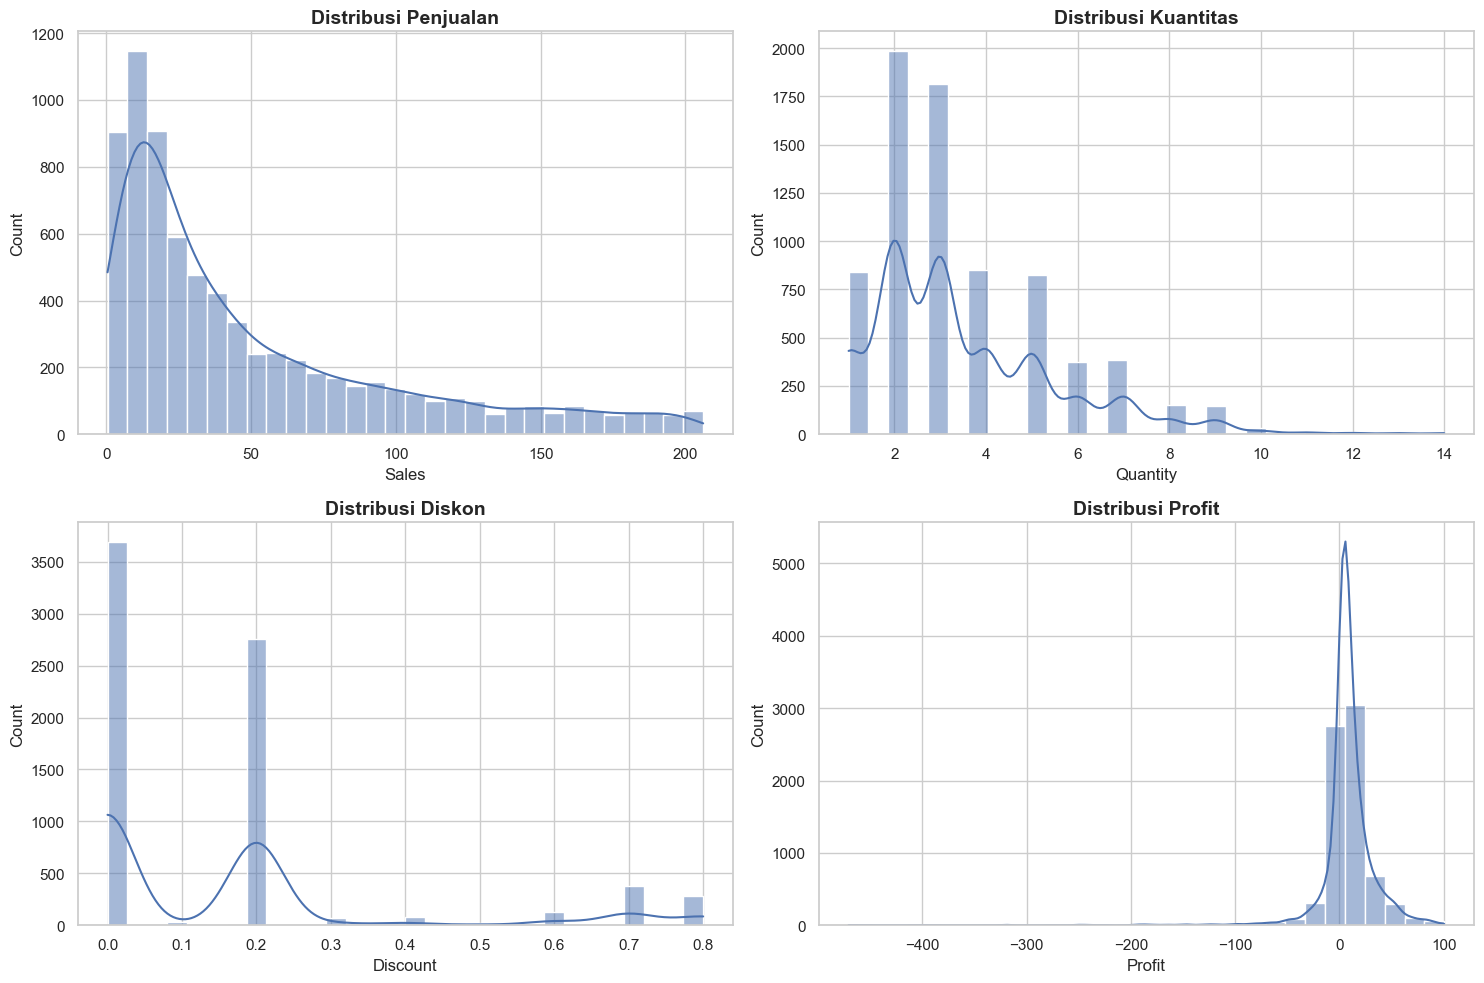

In [152]:
# Menganalisis distribusi data numerik: Penjualan, Diskon, Kuantitas, dan Profit

# Membuat figure dengan grid subplot 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Memplot Distribusi Penjualan
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Penjualan', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Memplot Distribusi Kuantitas
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Kuantitas', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Memplot Distribusi Diskon
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Diskon', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Memplot Distribusi Profit
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Profit', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Menyesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout()
plt.show()


Ringkasan Normalitas dan Distribusi Data:

    Penjualan:
        Sebagian besar transaksi memiliki nilai penjualan yang relatif rendah, sementara beberapa transaksi menunjukkan nilai penjualan yang sangat tinggi. Distribusi ini sangat miring ke kanan, sehingga data penjualan tidak berdistribusi normal.

    Kuantitas:
        Mayoritas transaksi melibatkan kuantitas pembelian yang kecil, dengan beberapa transaksi melibatkan kuantitas yang secara signifikan besar. Distribusi ini juga miring ke kanan, sehingga data kuantitas tidak berdistribusi normal.

    Diskon:
        Sebagian besar transaksi tidak menerapkan diskon, terlihat bahwa diskon 0% memiliki distribusi tertinggi, sementara yang lainnya umumnya rendah dalam penerapan diskon pada produk mereka. Data diskon tidak berdistribusi normal.

    Profit:
        Distribusi profit menunjukkan bentuk yang relatif lebih simetris dibandingkan dengan kolom lainnya, tetapi masih ada beberapa nilai ekstrem yang hadir di kedua sisi dengan nilai kurtosis > 3, yang menunjukkan leptokurtik. Data profit tidak berdistribusi normal.

a) Distribusi Penjualan Berdasarkan Segmen

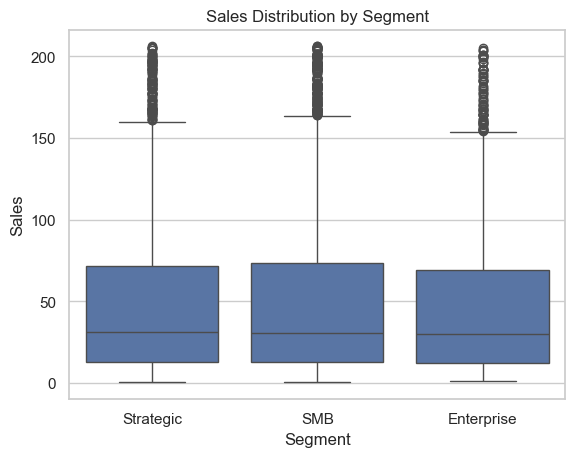

In [95]:
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution by Segment')
plt.show()

b) Tren Penjualan dari Waktu ke Waktu

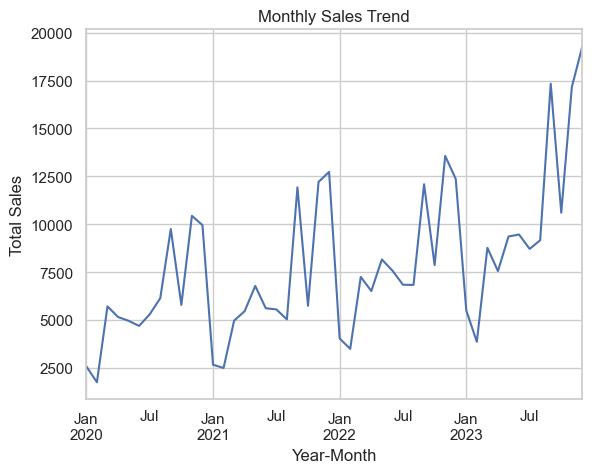

In [96]:
# Pastikan kolom tanggal sudah dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambahkan kolom tahun-bulan untuk agregasi
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Agregasi penjualan bulanan
monthly_sales = df.groupby('YearMonth')['Sales'].sum()

# Membuat grafik
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()


c) Distribusi Produk Terlaris

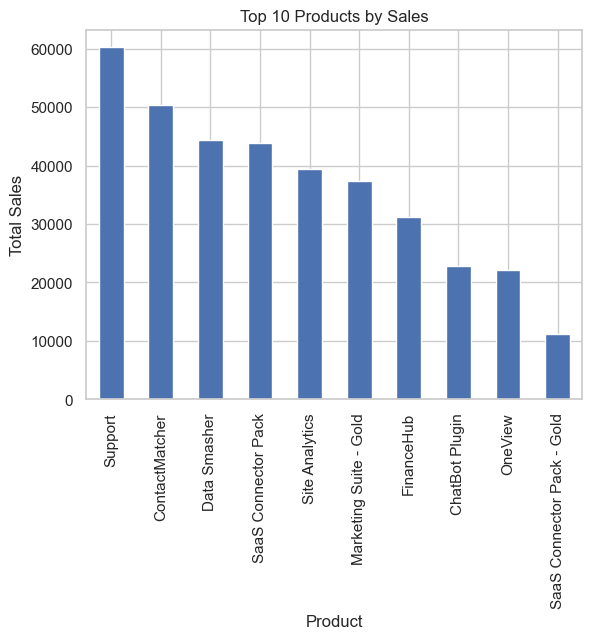

In [97]:
# Menghitung total penjualan per produk
top_products = df.groupby('Product')['Sales'].sum().nlargest(10)

# Membuat bar plot
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


a) Ukuran Tendensi Sentral

In [98]:
# Menghitung statistik deskriptif untuk kolom tertentu
print("Descriptive Statistics for Sales")
print(df['Sales'].describe())

print("Descriptive Statistics for Profit")
print(df['Profit'].describe())


Descriptive Statistics for Sales
count    7458.000000
mean       50.510115
std        50.512690
min         0.444000
25%        12.960000
50%        30.560000
75%        71.990000
max       206.112000
Name: Sales, dtype: float64
Descriptive Statistics for Profit
count    7458.000000
mean        8.134979
std        27.720821
min      -470.548000
25%         1.725150
50%         6.431400
75%        15.825600
max       100.425500
Name: Profit, dtype: float64


b) Ukuran Penyebaran

In [99]:
# Variabilitas
print("Standard Deviation for Sales:", df['Sales'].std())
print("Range for Sales:", df['Sales'].max() - df['Sales'].min())


Standard Deviation for Sales: 50.51269017819949
Range for Sales: 205.668


c) Analisis Distribusi Penjualan Berdasarkan Segmen

In [100]:
# Agregasi penjualan berdasarkan segmen
sales_by_segment = df.groupby('Segment')['Sales'].mean()
print("Average Sales by Segment:\n", sales_by_segment)


Average Sales by Segment:
 Segment
Enterprise    49.161119
SMB           51.117183
Strategic     50.254584
Name: Sales, dtype: float64


2. Analisis Statistik Inferensial
a) Uji Perbedaan Rata-Rata Penjualan

In [101]:
from scipy.stats import f_oneway

# Membandingkan rata-rata penjualan di antara beberapa segmen
f_stat, p_val = f_oneway(df[df['Segment'] == 'SMB']['Sales'],
                         df[df['Segment'] == 'Enterprise']['Sales'],
                         df[df['Segment'] == 'Strategic']['Sales'])

print("F-Statistic:", f_stat)
print("P-Value:", p_val)


F-Statistic: 0.7836993747200646
P-Value: 0.4567509514429554


b) Korelasi antara Penjualan dan Profit

In [102]:
# Korelasi Sales dan Profit
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales and Profit:", correlation)


Correlation between Sales and Profit: 0.26290074776349637


In [48]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()
print("Total Sales by Segment:\n", sales_by_segment)

Total Sales by Segment:
 Segment
Enterprise    4.296531e+05
SMB           1.161401e+06
Strategic     7.061464e+05
Name: Sales, dtype: float64


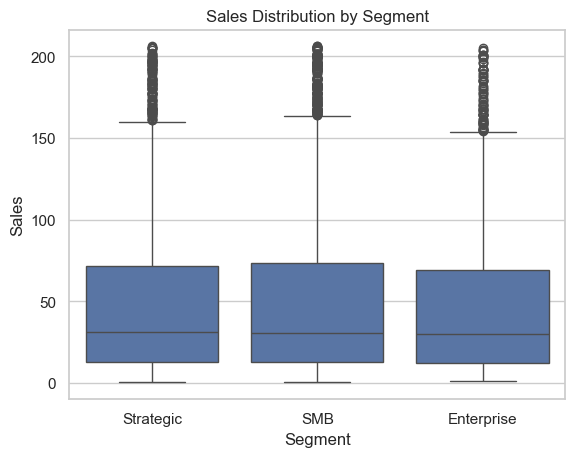

In [104]:
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution by Segment')
plt.show()

In [109]:

grouped_by_sales_Smallest = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=True).reset_index()

total_profit = grouped_by_sales_Smallest['Profit'].sum()


grouped_by_sales_Smallest['Sales'] = grouped_by_sales_Smallest['Sales'].apply(lambda x: f'${x:,.2f}')
grouped_by_sales_Smallest['Profit'] = ((grouped_by_sales_Smallest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_sales_Smallest['Quantity'] = grouped_by_sales_Smallest['Quantity'].apply(lambda x: f'{x} pcs')

grouped_by_sales_Smallest.head()

,Sales,Profit,Quantity
0,$0.44,-0.0%,1 pcs
1,$0.56,-0.0%,1 pcs
2,$0.84,-0.0%,1 pcs
3,$0.85,-0.0%,1 pcs
4,$0.88,-0.0%,1 pcs


In [40]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[APJ-2020-150924, AMER-2022-169887]"
1,Order Date,datetime64[ns],0,1237,"[2021-12-09T00:00:00.000000000, 2023-02-22T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Karen Langdon, Charles Churchill]"
3,Country,object,0,48,"[Czech Republic, Greece]"
4,City,object,0,262,"[Columbus, Abu Dhabi]"
5,Region,object,0,3,"[APJ, EMEA]"
6,Subregion,object,0,12,"[LATAM, NAMER]"
7,Customer,object,0,99,"[AT&T, Humana]"
8,Customer ID,object,0,99,"[1094, 1025]"
9,Industry,object,0,10,"[Finance, Transportation]"


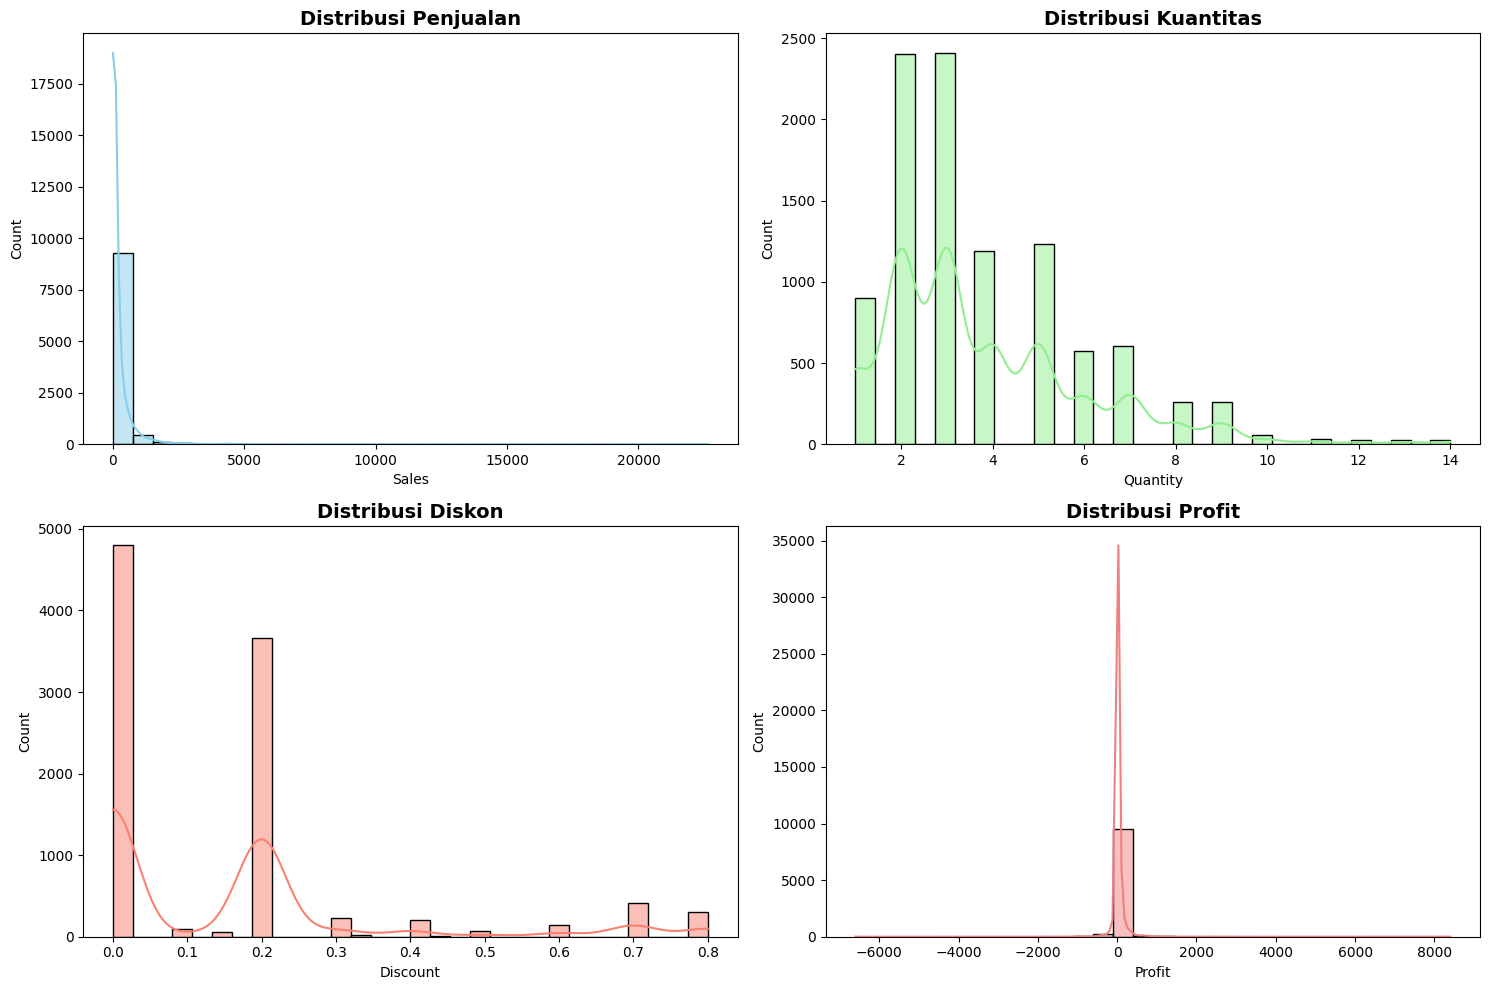

In [35]:
# Mengatur ukuran dan jumlah subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram untuk distribusi Sales
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Penjualan', fontsize=14, fontweight='bold')

# Histogram untuk distribusi Quantity
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribusi Kuantitas', fontsize=14, fontweight='bold')

# Histogram untuk distribusi Discount
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribusi Diskon', fontsize=14, fontweight='bold')

# Histogram untuk distribusi Profit
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Distribusi Profit', fontsize=14, fontweight='bold')

# Menyempurnakan layout
plt.tight_layout()
plt.show()


Ringkasan Normalitas dan Distribusi Data:

    Penjualan:
        Sebagian besar transaksi memiliki nilai penjualan yang relatif rendah, sementara beberapa transaksi menunjukkan nilai penjualan yang sangat tinggi. Distribusi ini sangat miring ke kanan sehingga data penjualan tidak normal.

    Kuantitas:
        Mayoritas transaksi melibatkan jumlah pembelian yang kecil, dengan beberapa transaksi yang melibatkan jumlah yang jauh lebih besar. Distribusi ini juga miring ke kanan sehingga data kuantitas tidak normal.

    Diskon:
        Sebagian besar transaksi tidak menerapkan diskon, terlihat bahwa pada diskon 0% memiliki distribusi tertinggi, dan yang lainnya umumnya rendah dalam menerapkan diskon pada produk mereka. Data diskon tidak normal.

    Laba:
        Distribusi laba relatif lebih simetris dibandingkan kolom lainnya, tetapi masih ada beberapa nilai ekstrem di kedua sisi dengan nilai kurtosis > 3 (leptokurtik). Data laba tidak normal.

In [33]:
df_msuite = df[df["Product"] == "Marketing Suite"]


df_msuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764


In [34]:
proportion = df_msuite['Segment'].value_counts()/len(df)
proportion

Segment
SMB           0.013108
Strategic     0.006404
Enterprise    0.003302
Name: count, dtype: float64

In [36]:
df_City = df_msuite.groupby('City')['Profit'].sum().sort_values(ascending=True)
df_City.head()

City
Paris           -2568.1413
St Petersburg   -1331.3179
Tokyo           -1120.4223
Mexico City      -884.9520
Moscow           -653.1820
Name: Profit, dtype: float64

In [42]:
# Memfilter DataFrame hanya untuk segmen yang ditentukan (SMB, Strategic, dan Enterprise) dengan profit negatif
segments = ['SMB', 'Strategic', 'Enterprise']
filtered_df = df_msuite[df_msuite['Segment'].isin(segments) & (df_msuite['Profit'] < 0)]

# Mengumpulkan data profit untuk setiap segmen
smb_profit = filtered_df[filtered_df['Segment'] == 'SMB']['Profit']
strategic_profit = filtered_df[filtered_df['Segment'] == 'Strategic']['Profit']
enterprise_profit = filtered_df[filtered_df['Segment'] == 'Enterprise']['Profit']

# Melakukan uji Kruskal-Wallis
h_stat, p_value = kruskal(smb_profit, strategic_profit, enterprise_profit)

# Menampilkan hasil uji
print(f"Uji Kruskal-Wallis:\nH-statistik: {h_stat}\nP-value: {p_value}")


Uji Kruskal-Wallis:
H-statistik: 4.641761111706851
P-value: 0.0981870883117581


## **Total Profit by Segment in Marketing Suite**


In [43]:
df_segment = df_msuite.groupby(['Segment','Customer'])['Profit'].sum().sort_values(ascending=True).reset_index()
df_segment['Profit'] = df_segment['Profit']

df_segment.head()

,Segment,Customer,Profit
0,SMB,Intel,-1597.0560
1,SMB,Nissan Motor,-1392.2704
2,Strategic,Banco Santander,-408.9124
3,Strategic,Phillips 66,-393.2583
4,SMB,Cisco Systems,-384.7164


C:\Users\huber\AppData\Local\Temp\ipykernel_64848\2381048996.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_customers = df_segment.groupby('Segment').apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)


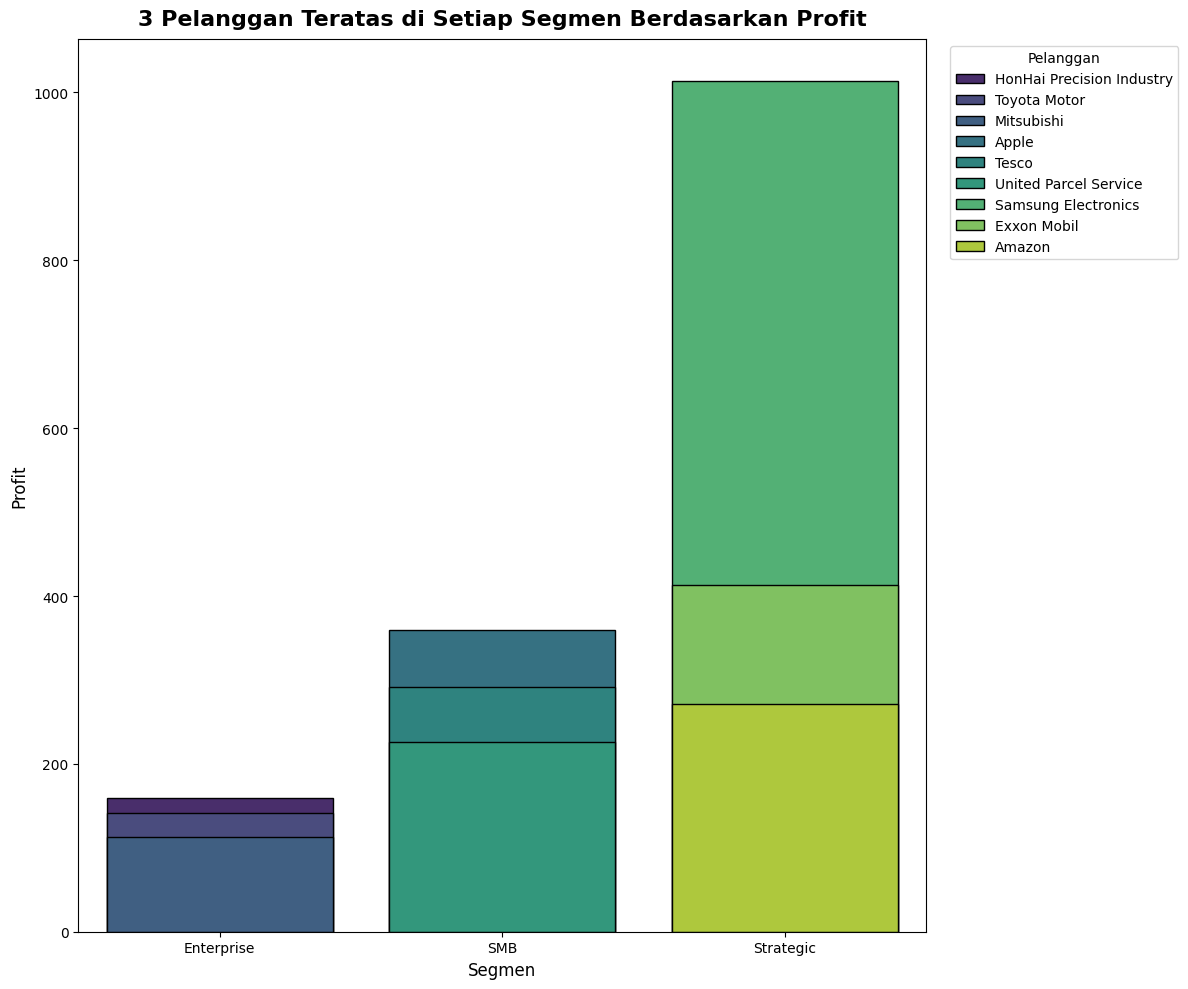

In [44]:
# Mengidentifikasi 3 pelanggan terbawah dalam setiap segmen
top_3_customers = df_segment.groupby('Segment').apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)

plt.figure(figsize=(12, 10))

# Membuat grafik batang bertumpuk yang terpusat untuk pelanggan top dan bottom dalam setiap segmen
sns.barplot(
    data= top_3_customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    palette='viridis',  
    edgecolor='black',  
    dodge=False  # Agar batangnya terpusat
)

plt.title('3 Pelanggan Teratas di Setiap Segmen Berdasarkan Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Pelanggan', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\huber\AppData\Local\Temp\ipykernel_64848\1265633827.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_customers = df_segment.groupby('Segment').apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)


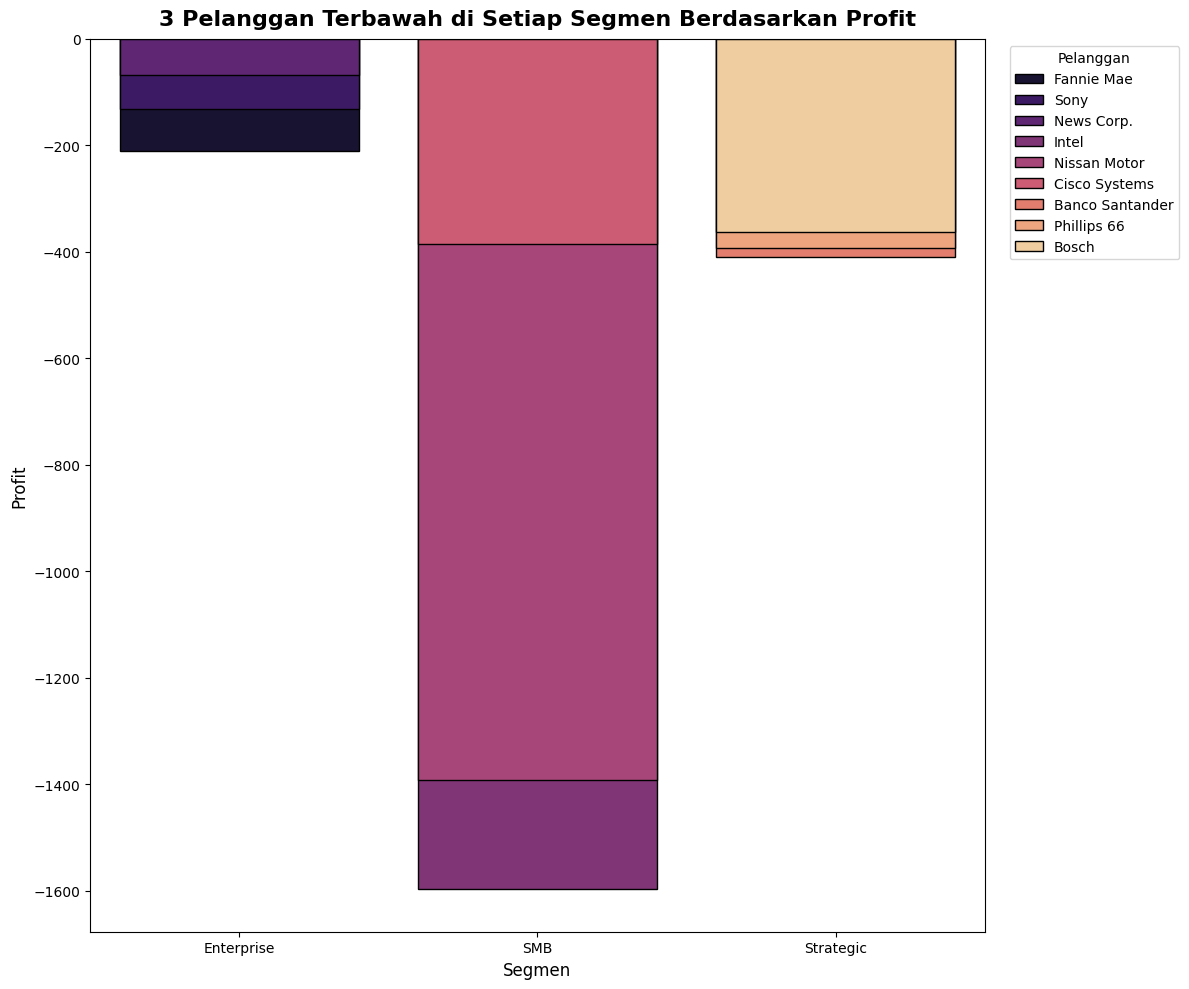

In [45]:
# Mengidentifikasi 3 pelanggan terbawah dalam setiap segmen
bottom_3_customers = df_segment.groupby('Segment').apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)

plt.figure(figsize=(12, 10))

# Membuat grafik batang bertumpuk yang terpusat untuk pelanggan top dan bottom dalam setiap segmen
sns.barplot(
    data=bottom_3_customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    palette='magma',  # Anda bisa memilih palet warna lainnya
    edgecolor='black',  # Menambahkan warna tepi untuk pemisahan yang lebih baik
    dodge=False  # Agar batangnya terpusat
)

plt.title('3 Pelanggan Terbawah di Setiap Segmen Berdasarkan Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Pelanggan', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


## **Purchase Frequency by Customer in Marketing Suite**


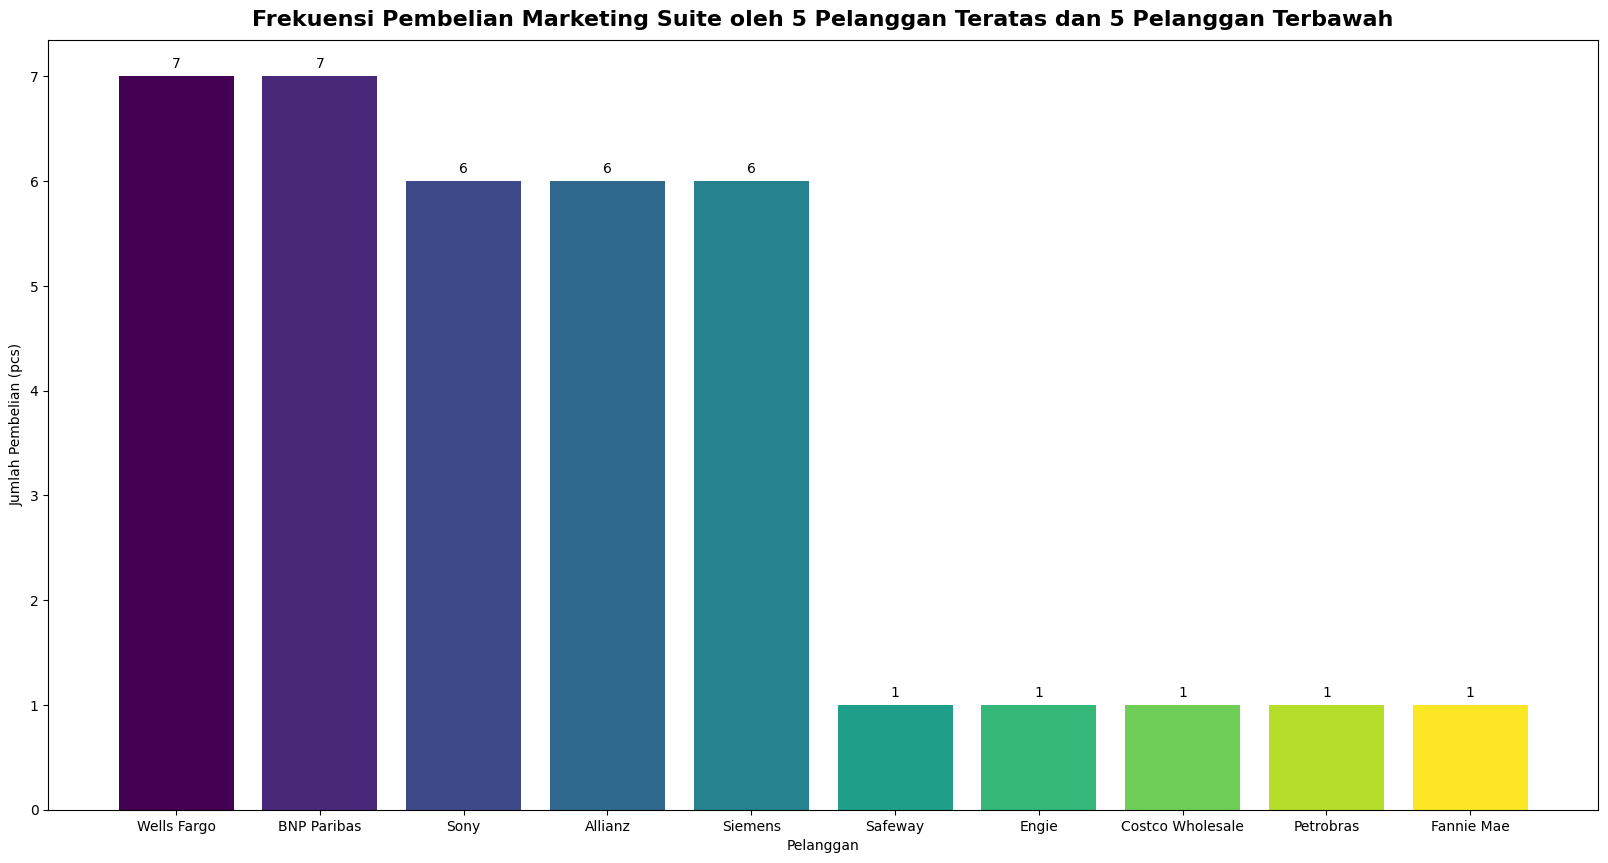

In [46]:
# Mengambil 5 pelanggan teratas
top_5_customers = df_msuite['Customer'].value_counts().nlargest(5)

# Mengambil 5 pelanggan terbawah
least_5_customers = df_msuite['Customer'].value_counts().nsmallest(5)

# Menggabungkan kedua series
selected_customers = pd.concat([top_5_customers, least_5_customers])

# Membuat grafik batang
plt.figure(figsize=(20, 10))

# Membuat warna acak untuk batang
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_customers)))

# Membuat plot data
bars = plt.bar(selected_customers.index, selected_customers, color=colors)

plt.title('Frekuensi Pembelian Marketing Suite oleh 5 Pelanggan Teratas dan 5 Pelanggan Terbawah', size=16, pad=10, fontweight='bold')
plt.xlabel('Pelanggan')
plt.ylabel('Jumlah Pembelian (pcs)')

# Menambahkan anotasi pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()


** Conclusion **


Produk Marketing Suite dalam perusahaan AWS SaaS secara konsisten menunjukkan margin keuntungan negatif selama periode yang dianalisis. Produk ini menjadi penghambat utama bagi profitabilitas keseluruhan lini produk perusahaan. Tren negatif dalam keuntungan ini menunjukkan perlunya perhatian segera dan intervensi strategis.

Produk Marketing Suite secara konsisten menunjukkan tren profitabilitas negatif di berbagai dimensi analisis. Hal ini terlihat jelas dari analisis korelasi, serta analisis berdasarkan wilayah, sub-wilayah, negara, kota, dan segmen pelanggan yang menunjukkan bahwa Marketing Suite menghadapi tantangan besar di wilayah, sub-wilayah, dan segmen pelanggan tertentu.


Recomendation


1. Optimalisasi Strategi Diskon:

    Tinjau kembali dan optimalkan strategi diskon untuk mencapai keseimbangan antara mendorong penjualan dan mempertahankan margin keuntungan. Pertimbangkan diskon bertingkat atau penawaran bersyarat untuk menjaga profitabilitas.
2. Inisiatif Berfokus pada Penjualan:

    Investasikan strategi yang meningkatkan penjualan tanpa terlalu bergantung pada diskon. Strategi ini, berdasarkan hubungan positif yang lemah antara penjualan dan laba/margin laba, dapat meningkatkan profitabilitas tanpa mengorbankan diskon.

